Imports

In [91]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Reading CSV

In [92]:
gdp_data = pd.read_csv(r'..\gdp_csv.csv')
internet_speed_data = pd.read_csv(r'..\internet_speeds.csv')
internet_access_data = pd.read_csv(r'..\internet_access.csv')
unemployment_data = pd.read_csv(r'..\unemployment.csv')

gdp = pd.DataFrame(gdp_data, columns=['Country Name', 'Country Code', 'Value', 'Year'])
internet_speed = pd.DataFrame(internet_speed_data, columns=['Country','Broadband Mbps', 'Mobile Mbps', 'As of'])
internet_access = pd.DataFrame(internet_access_data, columns=['LOCATION', 'Value', 'TIME'])
unemployment = pd.DataFrame(unemployment_data, columns=['LOCATION','Value', 'TIME'])

Renaming

In [93]:
gdp.rename(columns = {'Country Code':'CountryCode', 'Country Name':'CountryName', 'Year':'YearGDP', 'Value':'GDP'}, inplace = True)
internet_speed.rename(columns = {'Country':'CountryName', 'Broadband Mbps':'BroadbandSpeed', 'Mobile Mbps':'MobileSpeed', 'As of':'YearInternetSpeed'}, inplace = True)
internet_access.rename(columns={'TIME':'YearInternetAccess', 'Value':'InternetAccess', 'LOCATION':'CountryCode'}, inplace= True)
unemployment.rename(columns= {'LOCATION':'CountryCode', 'Value':'Unemployment', 'TIME':'YearUnemployment'}, inplace=True)

Removing Duplicates

In [94]:
gdp.sort_values(by=['CountryName','YearGDP'], ascending=False)
internet_speed.sort_values(by=['CountryName','YearInternetSpeed'], ascending=False)
internet_access.sort_values(by=['CountryCode', 'YearInternetAccess'], ascending=False)
unemployment.sort_values(by=['CountryCode', 'YearUnemployment'], ascending=False)

gdp.drop_duplicates(subset=['CountryCode'], keep='first')
gdp.drop_duplicates(subset=['CountryName'], keep='first')
internet_speed.drop_duplicates(subset=['CountryName'], keep='first')
internet_access.drop_duplicates(subset=['CountryCode'], keep='first')
unemployment.drop_duplicates(subset=['CountryCode'], keep='first')

,CountryCode,Unemployment,YearUnemployment
0,AUS,5.269611,2020-01
10,AUT,4.400000,2020-01
20,BEL,5.100000,2020-01
30,CAN,5.500000,2020-01
40,CZE,2.000000,2020-01
50,DNK,4.900000,2020-01
60,FIN,6.900000,2020-01
70,FRA,7.700000,2020-01
80,DEU,3.400000,2020-01
90,GRC,16.100000,2020-01


Merging

In [95]:
dataset = pd.merge(gdp, internet_speed, how='inner', on = 'CountryName')
dataset = pd.merge(dataset, internet_access, how='inner', on='CountryCode')
dataset = pd.merge(dataset, unemployment, how='inner', on='CountryCode')

Convert Units & Round

In [96]:
dataset['GDP'] = dataset['GDP'].div(1000000000).round(2)

GDP - Broadband Speed

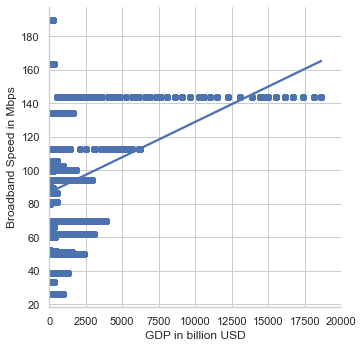

In [97]:
plotBroadBand = sns.lmplot(x="GDP", y="BroadbandSpeed", data=dataset)
plotBroadBand.set_xlabels('GDP in billion USD')
plotBroadBand.set_ylabels('Broadband Speed in Mbps')
plt.xlim(0, 20000)
plotBroadBand.savefig(r'..\output\GDP - Broadband Speed.png')
plt.show()

GDP - Mobile Speed

In [ ]:
plotBroadBand = sns.lmplot(x="GDP", y="MobileSpeed", data=dataset)
plotBroadBand.set_xlabels('GDP in billion USD')
plotBroadBand.set_ylabels('Mobile Speed in Mbps')
plt.xlim(0, 20000)
plotBroadBand.savefig(r'..\output\GDP - Mobile Speed.png')
plt.show()

Internet Access - Mobile Speed

In [ ]:
plotBroadBand = sns.lmplot(x="InternetAccess", y="MobileSpeed", data=dataset)
plotBroadBand.set_xlabels('Internet Access in %')
plotBroadBand.set_ylabels('Mobile Speed in Mbps')
plotBroadBand.savefig(r'..\output\Internet Access - Mobile Speed.png')
plt.show()

Internet Access - Broadband Speed

In [ ]:
plotBroadBand = sns.lmplot(x="InternetAccess", y="BroadbandSpeed", data=dataset)
plotBroadBand.set_xlabels('Internet Access in %')
plotBroadBand.set_ylabels('Broadband Speed in Mbps')
plotBroadBand.savefig(r'..\output\Internet Access - Broadband Speed.png')
plt.show()

Unemployment - Mobile Speed

In [ ]:
plotBroadBand = sns.lmplot(x="Unemployment", y="MobileSpeed", data=dataset)
plotBroadBand.set_xlabels('Unemployment in %')
plotBroadBand.set_ylabels('Mobile Speed in Mbps')
plotBroadBand.savefig(r'..\output\Unemployment - Mobile Speed.png')
plt.show()

Unemployment - Broadband Speed

In [ ]:
plotBroadBand = sns.lmplot(x="Unemployment", y="BroadbandSpeed", data=dataset)
plotBroadBand.set_xlabels('Unemployment in %')
plotBroadBand.set_ylabels('Broadband Speed in Mbps')
plotBroadBand.savefig(r'..\output\Unemployment - Broadband Speed.png')
plt.show()